# ???

This demo is supposed ???. 

This demo is written by [Markus Nölle](https://www.htw-berlin.de/hochschule/personen/person/?eid=9586) for a basic course on signals and systems hold at the [university of applied siences, Berlin](https://www.htw-berlin.de/).

**import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import ipywidgets as widgets

plt.style.use('noelle.mplstyle')

**generate rect signal**

In [2]:
sr = 100 # sample rate

dur = 10 # duration of signals in s
T0 = 1 # width of rectangle in s
T = T0/2 # repetition period in s 
dutyCyle = T0 / T # duty cycle of rect

t = np.arange(0, dur, 1 / sr)
f = np.fft.fftshift(np.fft.fftfreq(t.size, 1 / sr))

# generate signal
data = np.zeros(t.size)

# symmetric periodic rect-signal
# data[(t % T) < (dutyCyle * T / 2)] = 1
# data[(t % T)>(T-dutyCyle*T/2)] = 1

# asymmetric periodic rect-signal
# data[(t % T) < (dutyCyle * T)] = 1

# asymmetric rect-signal
data[(t > (T-T0/2)) & (t < (T+T0/2))] = 1

# calc spectrum of data signal (and normalize)
Data = np.fft.fft(data)
DataNorm = Data / np.max(np.abs(Data))

**plot signal**

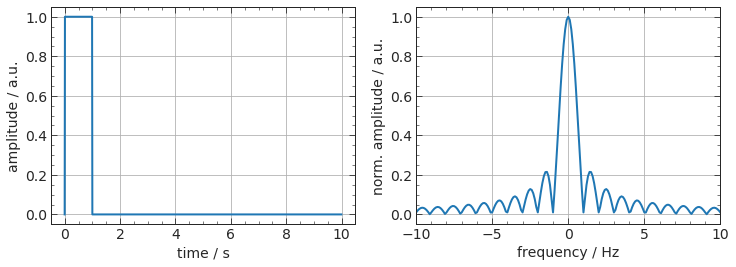

In [3]:
n_row = 1
n_col = 2
fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
fig, ax = plt.subplots(n_row, n_col, figsize=fig_size)

ax[0].plot(t, data)
ax[0].set_xlabel('time / s')
ax[0].set_ylabel('amplitude / a.u.')

ax[1].plot(f, np.fft.fftshift(np.abs(DataNorm)))
ax[1].set_xlabel('frequency / Hz')
ax[1].set_ylabel('norm. amplitude / a.u.')
ax[1].set_xlim(-10, 10)

# ax[2].plot(f, np.fft.fftshift(np.angle(Data) / np.pi))
# ax[2].set_xlabel('frequency / Hz')
# ax[2].set_ylabel('angle / \pi / rad')
# ax[2].set_xlim(-10, 10)

plt.show()

**generate and plot impulse response**

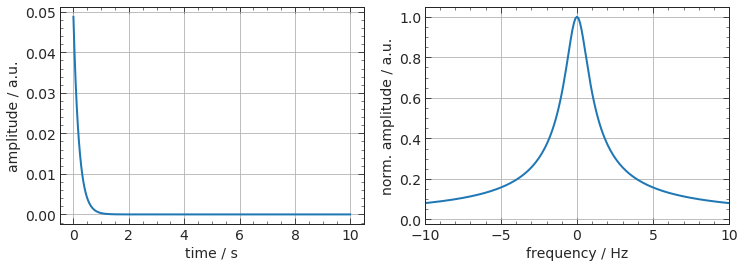

In [4]:
# decay rate
alpha = -5
# exponential decaying h of length 1 s
h = np.exp(alpha * t)
h = h / np.sum(h)

# frequency response (and normalize)
H = np.fft.fft(h)
HNorm = H / np.max(np.abs(H))

# plots
n_row = 1
n_col = 2
fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
fig, ax = plt.subplots(n_row, n_col, figsize=fig_size)

ax[0].plot(t,h)
ax[0].set_xlabel('time / s')
ax[0].set_ylabel('amplitude / a.u.')

ax[1].plot(f, np.fft.fftshift(np.abs(HNorm)))
ax[1].set_xlabel('frequency / Hz')
ax[1].set_ylabel('norm. amplitude / a.u.')
ax[1].set_xlim(-10, 10)

plt.show()

**filter signal and plot filtered signal**

$Y(j\omega)=X(j\omega) \cdot H(j\omega)$

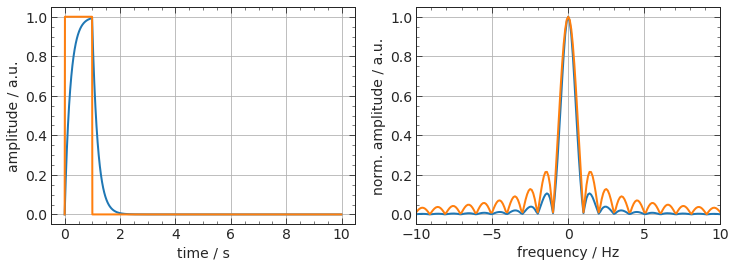

In [5]:
DataFiltNorm = DataNorm * HNorm
DataFilt = Data * H
dataFilt = np.real(np.fft.ifft(DataFilt))

n_row = 1
n_col = 2
fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
fig, ax = plt.subplots(n_row, n_col, figsize=fig_size)

ax[1].plot(f, np.fft.fftshift(np.abs(DataFiltNorm)), f, np.fft.fftshift(np.abs(DataNorm)))
ax[1].set_xlabel('frequency / Hz')
ax[1].set_ylabel('norm. amplitude / a.u.')
ax[1].set_xlim(-10, 10)

ax[0].plot(t, dataFilt, t, data)
ax[0].set_xlabel('time / s')
ax[0].set_ylabel('amplitude / a.u.')

plt.show()

**put all together in one function with sliders**

In [6]:
def testFun(alpha=-50.0):
    
    sr = 100 # sample rate

    dur = 10 # duration of signals in s
    T0 = 1 # width of rectangle in s
    T = T0/2 # repetition period in s 
    dutyCyle = T0 / T # duty cycle of rect

    t = np.arange(0, dur, 1 / sr)
    f = np.fft.fftshift(np.fft.fftfreq(t.size, 1 / sr))

    # generate signal
    data = np.zeros(t.size)

    # symmetric periodic rect-signal
    # data[(t % T) < (dutyCyle * T / 2)] = 1
    # data[(t % T)>(T-dutyCyle*T/2)] = 1

    # asymmetric periodic rect-signal
    # data[(t % T) < (dutyCyle * T)] = 1

    # asymmetric rect-signal
    data[(t > (T-T0/2)) & (t < (T+T0/2))] = 1

    # calc spectrum of data signal (and normalize)
    Data = np.fft.fft(data)
    DataNorm = Data / np.max(np.abs(Data))


    # exponential decaying h of length 1 s
    h = np.exp(alpha * t)
    h = h / np.sum(h)

    # frequency response (and normalize)
    H = np.fft.fft(h)
    HNorm = H / np.max(np.abs(H))

    # plots
    n_row = 2
    n_col = 2
    fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
    fig, ax = plt.subplots(n_row, n_col, figsize=fig_size)
   
    ax[0][0].plot(t,h)
    ax[0][0].set_xlabel('time / s')
    ax[0][0].set_ylabel('amplitude / a.u.')
    ax[0][0].set_xlim(0, 5) 
    
    ax[0][1].plot(f, np.fft.fftshift(np.abs(HNorm)))
    ax[0][1].set_xlabel('frequency / Hz')
    ax[0][1].set_ylabel('norm. amplitude / a.u.')
    ax[0][1].set_xlim(-10, 10)
    
    DataFiltNorm = DataNorm * HNorm
    DataFilt = Data * H
    dataFilt = np.real(np.fft.ifft(DataFilt))

    ax[1][1].plot(f, np.fft.fftshift(np.abs(DataNorm)), f, np.fft.fftshift(np.abs(DataFiltNorm)))
    ax[1][1].set_xlabel('frequency / Hz')
    ax[1][1].set_ylabel('norm. amplitude / a.u.')
    ax[1][1].set_xlim(-10, 10)    
    ax[1][1].legend(['input signal','output signal'])  

    ax[1][0].plot(t, data, t, dataFilt)
    ax[1][0].set_xlabel('time / s')
    ax[1][0].set_ylabel('amplitude / a.u.') 
    ax[1][0].set_xlim(0, 5)   
    ax[1][0].legend(['input signal','output signal'])    

    plt.show()
    
widgets.interact(testFun, alpha=(-50.0, 0.0, 1.0));

interactive(children=(FloatSlider(value=-50.0, description='alpha', max=0.0, min=-50.0, step=1.0), Output()), …